In [92]:
# Import required libaries 

#Data analysis libaries
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

#you can add this or add it
#from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

### Load dataset and Data inspection

In [93]:
customer_info = pd.read_csv("/Users/user/Downloads/Customer-Churn - Customer-Churn.csv")
customer_info.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2678,7026-YMSBE,Male,0,No,No,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,625.05,No
3270,4132-KALRO,Female,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,100.85,399.25,No
3717,0655-YDGFJ,Male,0,No,No,29,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),48.95,1323.70,No
4798,4948-WBBKL,Female,1,No,No,36,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.90,2659.45,No
3631,2722-JMONI,Female,1,Yes,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.55,49.55,Yes


In [86]:
#to know the number of rows and column
customer_info.shape

(7043, 21)

In [87]:
#to observe we have missing value and all that
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
# To understand the data  statistically
customer_info.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Fix Data problem

In [89]:
# To check if we have missing value
customer_info.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 missing values in TotalCharges and we have to median it for smooth

In [90]:
customer_info['TotalCharges'] = pd.to_numeric(customer_info['TotalCharges'], errors='coerce')
customer_info['TotalCharges'].fillna(customer_info['TotalCharges'].median(), inplace=True)

In [9]:
customer_info.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
customer_info.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


We want to differentiate  categorical and numerical column in our data

In [11]:
num_columns = customer_info.select_dtypes(include=['int64','float64']).columns
cat_columns = customer_info.select_dtypes(include=['object','category']).columns

print("num_columns:", num_columns)
print("cat_columns:", cat_columns)

num_columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
cat_columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


We have to convert SeniorCitizen to categorical because it is saved as numerical (int64) in our data

In [14]:
customer_info['SeniorCitizen'] = customer_info['SeniorCitizen'].astype('category')

i dropped customerID because is just for identifer its not useful for prediction

In [ ]:
customer_info.drop("customerID", axis=1, inplace=True)

In [16]:
num_columns = customer_info.select_dtypes(include=['int64','float64']).columns
cat_columns = customer_info.select_dtypes(include=['object','category']).columns

print("num_columns:", num_columns)
print("cat_columns:", cat_columns)

num_columns: Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
cat_columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [17]:
customer_info.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2170,Female,0,No,No,21,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Electronic check,60.25,1258.35,No
303,Female,0,Yes,Yes,68,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),60.30,4109.00,No
4103,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),90.80,6511.80,No
2389,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
111,Female,0,No,No,52,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Credit card (automatic),57.95,3042.25,No


## EDA

### Univariate Analysis
Single Column

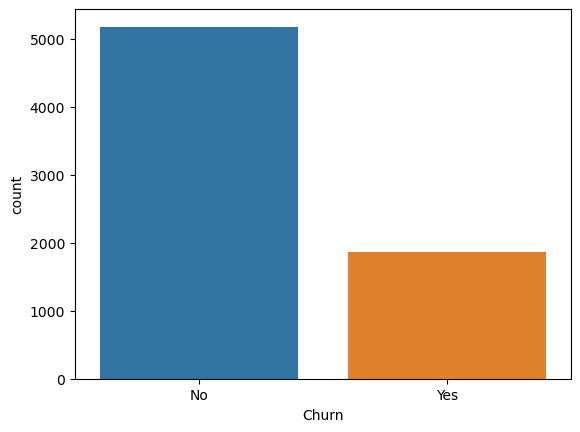

In [18]:
# To check churn distribution
sns.countplot(x='Churn', hue='Churn', data=customer_info)
plt.show()

We performed a Univariate analysis target variable, churn. We use countplot to visualize the frequency of each category 
within the dataset to understand the distribution of customers who have stayed with the company versus those who left and 
countplot shows that over 5000 stay while approximately 2000 left. The majority of the customer retained.

## Bivariate 

Churn over Other fearures

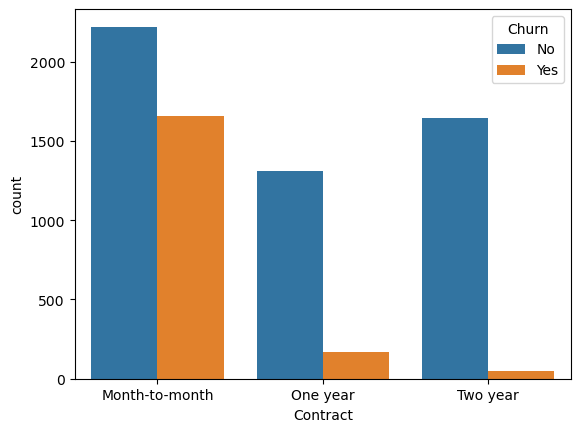

In [19]:
sns.countplot(x='Contract',hue='Churn', data=customer_info)
plt.show()

Moving into Bivariate Analysis, we examined the relationship between contract types and churn.This chart tells a very clear 
story about customer loyalty.
1) Customer on month to month contracts have the highest volume of churn. The ratio of churners ('Yes') to non-churners ('No') is alarmingly high in this category compared to the others.
2) As the contract term increases, the churn rate drops significantly. for Oneyear contracts, churn is minimal, and for two years contract, it is also negligible.
3) Most of the companys "stable" or long-term customers, thise who dont churn appear to be distributed across all contract types, but the two-years contract acts as the strongest "lock for retention.

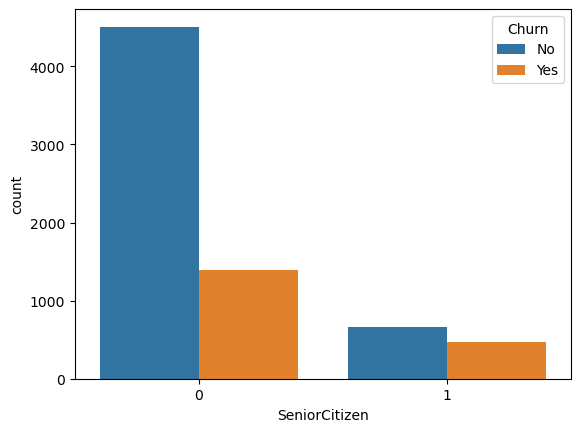

In [20]:
sns.countplot(x='SeniorCitizen',hue='Churn', data=customer_info)
plt.show()

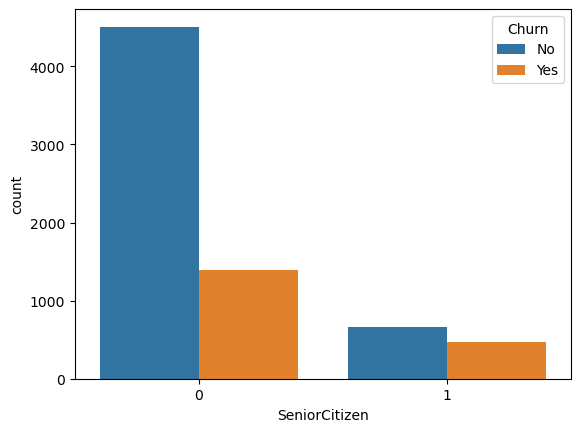

In [20]:
sns.countplot(x='SeniorCitizen',hue='Churn', data=customer_info)
plt.show()

In the '0' (Non-senior) category, the blue bar (No churn) is more than 3x the orange bar (Churn). However, in the 
'1' (Senior) category, the bars are much closer in height, suggesting that seniors are leaving at a much higher  relative rate
than younger customers.

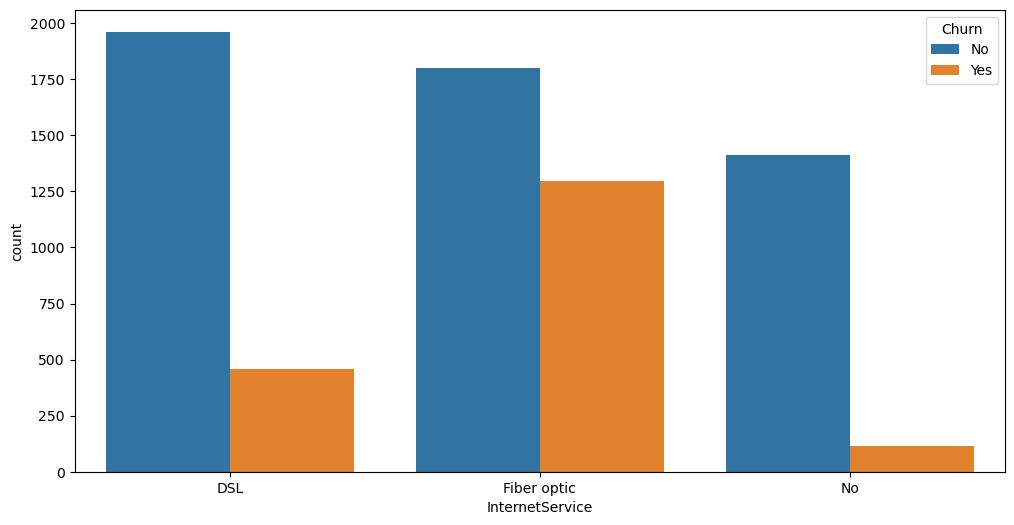

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService',hue='Churn', data=customer_info)
plt.show()

This plot explores the relationship between the type of internet technology used and customer churn
1) fibre Optic Concern: Customers using Fiber optic service have the highest churn volume. The ratio of churners to non-churners
is highest in this category compared to DSL or those with no internet service.
2) DSL stability: DsL users show a much lower churn rate, with the vast majority of these customers remaining with the company
3) No: Customer without internet service have the lowest overall churn volume and rate.
4) 

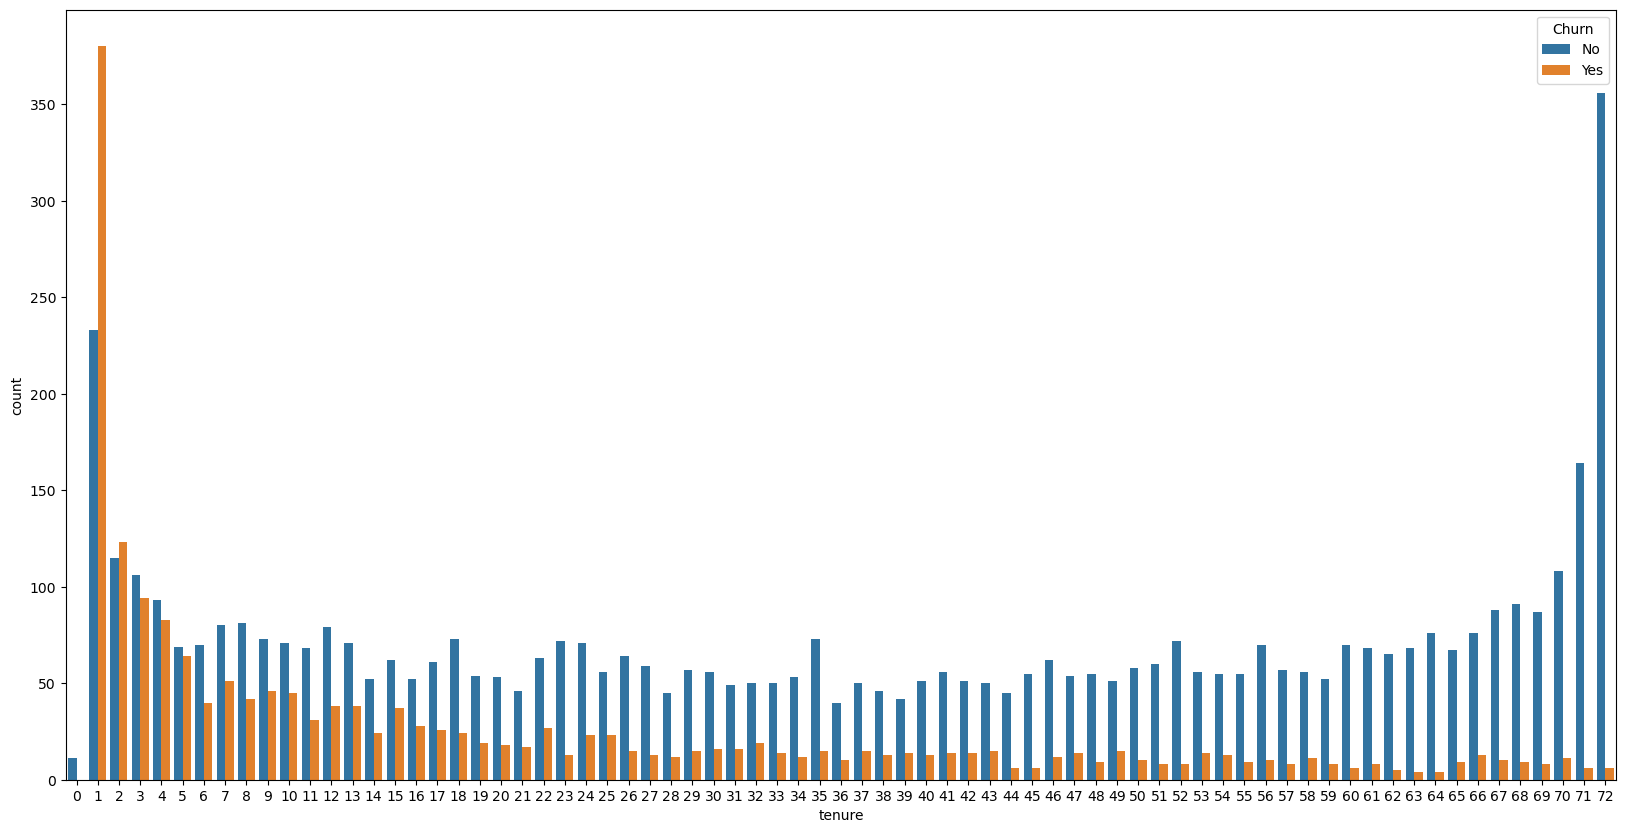

In [98]:
plt.figure(figsize=(20,10))
sns.countplot(x='tenure',hue='Churn', data=customer_info)
plt.show()   #try expanding the size later

Thisn analysis examines the relationship between how long a customer has been with the comapany and their likehood churn.
1) There is a massive spike in churn at month 0 and 1 this suggest that many customers leave almost immediately after signing up,possibly due to poor on boarding experience or unmet expectations.
2) The Ushape show churn is very at the beginning of the relationship, stabilizes during the middle months, and then there is a high concentration of very loyal, non churning customers at the maximum tenure mark (likely month 72).
3) Generally the orange bar (churn Yes) get shorter as you move from left to right. The longer a customer stays, the less likely they are to leave. 


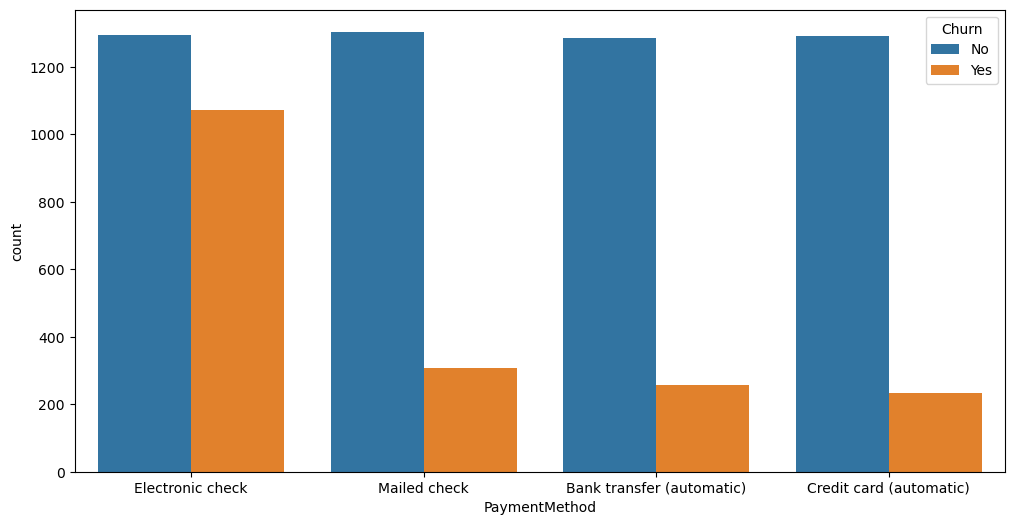

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(x='PaymentMethod',hue='Churn', data=customer_info)
plt.show()

This analysis looks at whether the way a customer pays their bill influences their likehood to leave the service.
1)customer using Electronic check have a significantly higher churn rate compared to all other payment methods. The ratio of churners ('Yes) to non_churners ('No') is nearly 1:1 in this category.
2) Customer with bank transfer or credit card (automatic) show the lowest churn levels. These automatic methods seem to "lock in" customers
or reduce friction that might otherwise lead to cancellation.
3) Mailed check: While the volume of mailed check users is high, the churn rate remians relatively low compared to electronic checks

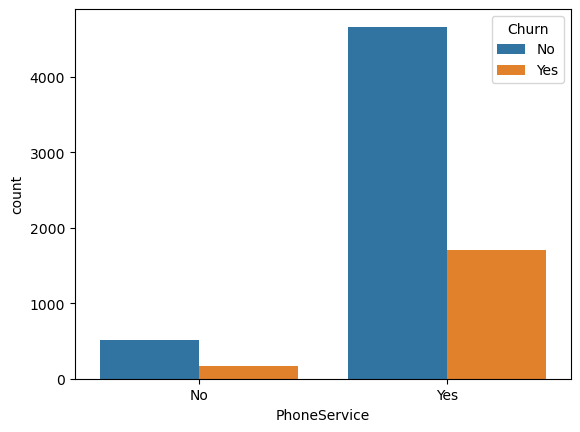

In [24]:
sns.countplot(x='PhoneService',hue='Churn', data=customer_info)
plt.show()

The vast majority

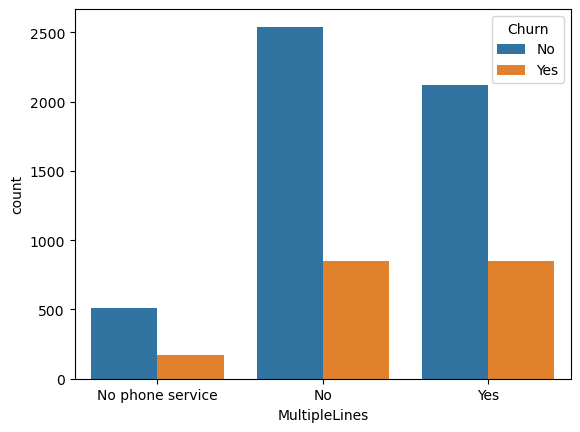

In [25]:
sns.countplot(x='MultipleLines',hue='Churn', data=customer_info)
plt.show()

### Correlation

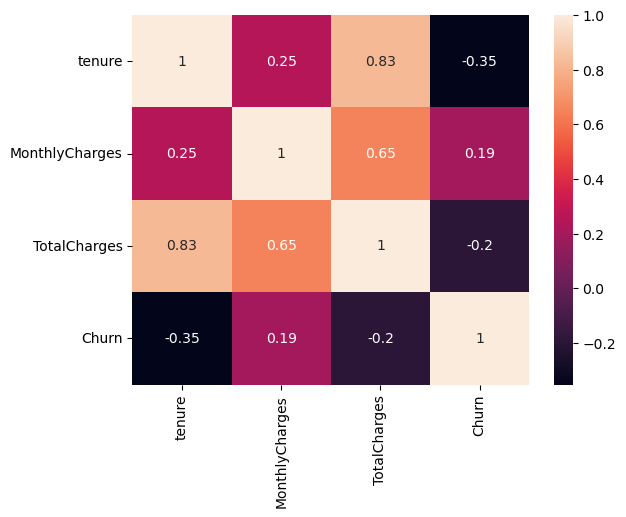

In [37]:
sns.heatmap(customer_info.corr(numeric_only=True), annot=True)
plt.show()

1) The most significant connection here is between tenure and TotalCharges. This makes perfect sense: The longer a customer stays
with the company, the more money they have paid in total over time. its a very strong positive correlation, confirming that your "TotalCharges' data is consistent with how long people have been subscribed.
2)When looking at churn row/column, tenure vs churn (-0.35) This is a negative correlation, which is actually a good thing. it suggests that as tenure increases, churn decreases. Basically, your long- term customers are much less likely to leave than new ones.
3)MonthlyCharges has a positive correlation. it indicates that as monthly bills get higher, the likehood of a customer leaving also tends to tick upward. its not a massive connection, but its a visible trend.
4) Montlyly Charges and TotalCharges also has a positive relationship. Higher monthly bills naturally lead to higher total lifetime spending. while obvious, it confirms that your high value monthly custimers are indeed driving your total revenue even if they havent been ariund as long some low-cost legacy customers.

## Feature Learning

To prepare our data from machine learning

In [30]:
# convert churn 1 and 0
customer_info['Churn']= customer_info['Churn'].map({'Yes':1, 'No':0}) 

In [36]:
customer_info.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4106,Female,1,Yes,No,24,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.55,2264.05,1
2920,Female,0,Yes,No,72,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,85.10,6155.40,0


### convert categorical Columns

since our dataset has many categorical variables

In [45]:
#This covert all objects into multiple (1/0 - true/false)
customer_info_f = pd.get_dummies(customer_info, drop_first=True)

#To check the new shape - you will have more columns
print(customer_info_f.shape)

(7043, 31)


In [41]:
customer_info_f.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### Split Data

In [47]:
from sklearn.model_selection import train_test_split

In [78]:
X = customer_info_f.drop('Churn', axis=1)
y = customer_info_f['Churn']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)                      

### Train 3 model (As required)

In [79]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

#initialize the model
lr = LogisticRegression(max_iter=1000)

#Fit the model 
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [80]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluate Models

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[947  89]
 [205 168]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



confusion matrix shows and identify 947 non-churn customers and 168 churn customers 


Customer churn is a major challenge for subscription-based businesses, as losing customers directly affects revenue and growth.
This project aims to develop a machine learning model that can predict whether a customer is likely to churn or stay, using historical customer data.
Thr goal is to help businesses identify at-risk customers and take proactive retention actions 

although the model achieves an overall accuracy of 79%, it showed lower effectiveness in identifying actual churn customers, with a recall score of 45%. This highlights the challenges of detecting churn and the need for further improvement in model sensitivity toward churn cases.